## Seeing issues when calling `fetch` over the remote SDK

In [1]:
from typing import *
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def get_meta(file_path: str) -> Dict[str, str]:
    """
    Returns a dictionary of metadata associated with a previous SpikeGLX acquisition run.
    Only used when DEBUG_MODE=True.

    Should be a file_path that ends in `.meta`

    Parameters
    ----------
    file_path : str
        File name containing the metadata
    """
    # conver to path object
    file_path = Path(file_path)

    # initialize dictionary
    metadata = dict()

    if file_path.exists():
        with file_path.open() as f:
            mdata = f.read().splitlines()
            for m in mdata:
                item = m.split(sep='=')
                if item[0][0] == '~':
                    key = item[0][1:len(item[0])]
                else:
                    key = item[0]
                metadata.update({key: item[1]})
    else:
        raise FileNotFoundError(file_path)

    return metadata



def get_sample_data(file_path: str, meta_data: Dict[str, str]):
    """
    Returns a numpy array of data from a previous SpikeGLX acquisition run.

    Should be a file_path that ends in `.bin`

    Parameters
    ----------
    file_path : str
        File name of the binary file containing the data
    meta_data : Dict[str, str]
        Dictionary containing metadata needed to load the data in the correct format
    """
    nChan = int(meta_data['nSavedChans'])
    nFileSamp = int(int(meta_data['fileSizeBytes'])/(2*nChan))

    data = np.memmap(file_path, dtype='int16', mode='r',
                        shape=(nChan, nFileSamp), offset=0, order='F')

    return data

In [25]:
meta_data = get_meta("/home/clewis/repos/realSpike/data/120s_test/rb50_20250126_g0_t0.imec0.ap.meta")
sample_data = get_sample_data("/home/clewis/repos/realSpike/data/120s_test/rb50_20250126_g0_t0.imec0.ap.bin", meta_data)[:150, :]

In [26]:
sample_data.shape

(150, 3600001)

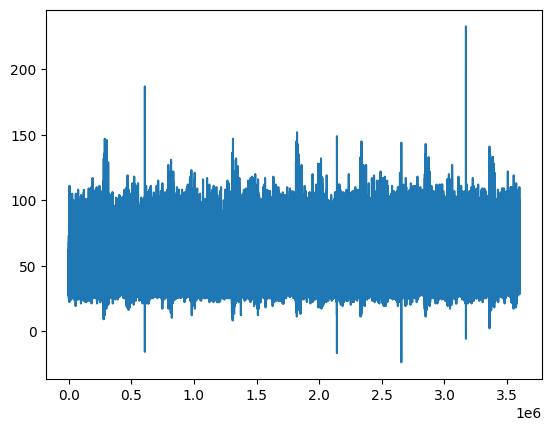

In [27]:
plt.plot(np.max(sample_data, axis=0))

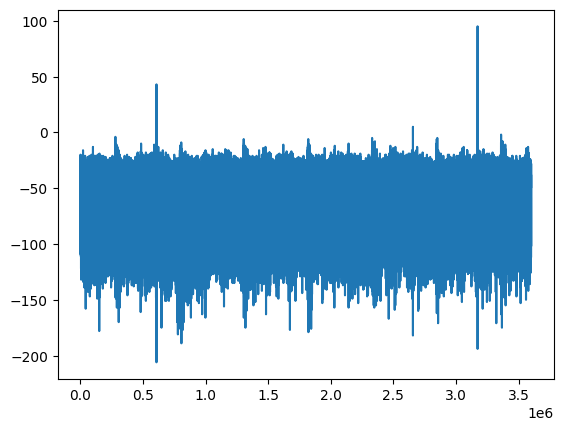

In [28]:
plt.plot(np.min(sample_data, axis=0))

In [29]:
Vmax = float(meta_data["imAiRangeMax"])
# get Imax
Imax = float(meta_data["imMaxInt"])
# get gain
gain = float(meta_data['imroTbl'].split(sep=')')[1].split(sep=' ')[3])

In [30]:
data = 1e6 * sample_data * Vmax / Imax / gain

In [31]:
np.max(data, axis=0).max()

546.09375

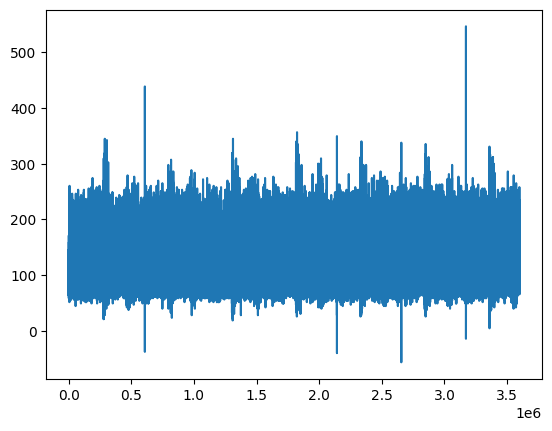

In [32]:
plt.plot(np.max(data, axis=0))

In [33]:
np.min(data, axis=0).min()

-482.8125

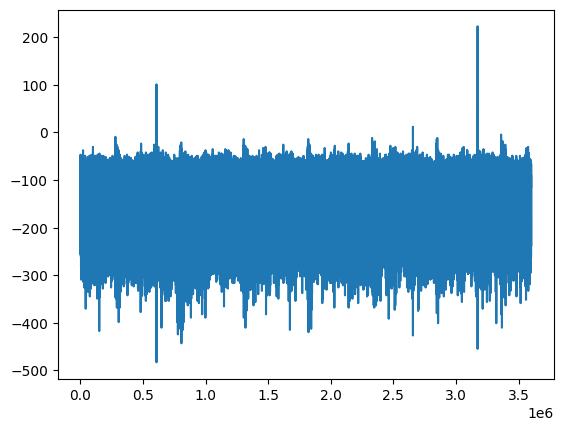

In [34]:
plt.plot(np.min(data, axis=0))

In [35]:
data[:, :150]

array([[ 39.84375,  39.84375,  35.15625, ...,  39.84375,  49.21875,
         46.875  ],
       [-21.09375, -28.125  , -23.4375 , ...,  -4.6875 , -18.75   ,
         -7.03125],
       [ -7.03125,  -9.375  , -18.75   , ..., -16.40625, -14.0625 ,
         -4.6875 ],
       ...,
       [ 37.5    ,  42.1875 ,  44.53125, ...,  28.125  ,  23.4375 ,
         46.875  ],
       [ 44.53125,  30.46875,  25.78125, ...,  32.8125 ,  35.15625,
         32.8125 ],
       [ 77.34375,  72.65625,  67.96875, ...,  77.34375,  91.40625,
         82.03125]])

In [2]:
median_true = np.load("../data/120s_test/medians_debug_true.npy")
median_true

array([ 0.057269  , -0.18966783, -0.17374463,  0.13544588,  0.1783747 ,
        0.12046184,  0.15566634, -0.09498085, -0.06338663,  0.26840501,
        0.1689784 , -0.12136869,  0.18523248,  0.03162762, -0.09708332,
       -0.02438553,  0.08338179,  0.20473916,  0.23822023,  0.22548075,
        0.02604583, -0.02002568,  0.20639363,  0.09873167,  0.22470139,
       -0.06969829, -0.12211721,  0.56819453,  0.07145156,  0.0489823 ,
       -0.04860697,  0.57866262, -0.3400172 , -0.12637194, -0.1188125 ,
        0.83234113,  0.25102793,  0.73323414,  0.00802282, -0.11488717,
       -0.10707765, -0.27602393, -0.17722575,  0.11563189,  0.29691989,
        0.4890886 , -0.07970945,  0.48823258, -0.02492212,  0.72367252,
       -0.04546462,  0.35071629,  0.675351  ,  0.42021493,  0.53567885,
        0.70589848, -0.33927083,  0.02486976, -0.07035637, -0.18698799,
       -0.46085157, -0.00344784,  0.77923053,  0.49802585,  0.24120293,
        0.10091176, -0.35485444,  0.09375373, -0.23291155,  0.61

In [3]:
median_false = np.load("../data/120s_test/medians_debug_false.npy")
median_false

array([-1.70341532, -2.05438645, -1.51790802, -2.04000153, -2.23450669,
       -2.02184319, -1.84771638, -2.22146323, -2.0946726 , -2.57511498,
       -2.0270732 , -1.82203657, -1.65534572, -1.73726654, -1.81044755,
       -1.97252145, -2.00678054, -1.78026763, -2.29021141, -2.01995002,
       -1.71638014, -1.57102182, -1.56849099, -1.65724254, -1.57614164,
       -0.93694501, -0.85856989, -1.22481352, -1.85459001, -1.92052028,
       -1.94008471, -1.59729502, -1.87192274, -1.76715316, -1.79169142,
       -2.11809737, -1.83708513, -1.6892254 , -1.63876377, -1.55184981,
       -2.13605263, -1.33492869, -1.72353994, -2.04305959, -1.68926175,
       -1.24344587, -1.80651279, -1.96546058, -1.73705039, -1.8996349 ,
       -1.5278444 , -1.57486389, -1.4193673 , -1.49276513, -1.22631764,
       -1.69034416, -1.91344365, -1.62461143, -1.66560872, -1.75183254,
       -1.57422724, -1.21446759, -1.46293381, -1.64983097, -2.02804357,
       -1.42260568, -1.58673379, -2.10317694, -1.49418202, -1.86

In [ ]:
# ch0 ch1 ch2 ch0 ch1 ch2 
# (2, 3) 
num_channels = 3
t = 2

In [9]:
d = np.array([0, 1, 2, 0, 1, 2])
d.shape

(6,)

In [15]:
d.reshape(2, 3)

array([[0, 1, 2],
       [0, 1, 2]])

In [16]:
d.reshape(2, 3).T

array([[0, 0],
       [1, 1],
       [2, 2]])

In [17]:
a = np.load("../data/120s_test/5ms_debug_False_frame_0.npy")

In [18]:
a.shape

(150, 150)

In [20]:
a.ravel().shape

(22500,)

In [21]:
a.T[0]

array([39.84375, 35.15625, 44.53125, 49.21875, 39.84375, 32.8125 ,
       30.46875, 37.5    , 35.15625, 30.46875, 39.84375, 23.4375 ,
       25.78125, 30.46875, 37.5    , 44.53125, 35.15625, 39.84375,
       35.15625, 44.53125, 39.84375, 28.125  , 35.15625, 49.21875,
       53.90625, 49.21875, 42.1875 , 39.84375, 42.1875 , 39.84375,
       35.15625, 49.21875, 42.1875 , 37.5    , 53.90625, 32.8125 ,
       35.15625, 25.78125, 32.8125 , 39.84375, 25.78125, 23.4375 ,
       18.75   , 23.4375 , 28.125  , 39.84375, 56.25   , 35.15625,
       35.15625, 39.84375, 39.84375, 42.1875 , 46.875  , 35.15625,
       30.46875, 21.09375, 37.5    , 44.53125, 39.84375, 28.125  ,
       35.15625, 35.15625, 23.4375 , 21.09375, 21.09375, 32.8125 ,
       46.875  , 37.5    , 39.84375, 25.78125, 37.5    , 49.21875,
       32.8125 , 44.53125, 37.5    , 32.8125 , 39.84375, 37.5    ,
       32.8125 , 35.15625, 39.84375, 42.1875 , 30.46875, 21.09375,
       37.5    , 49.21875, 46.875  , 44.53125, 46.875  , 53.90

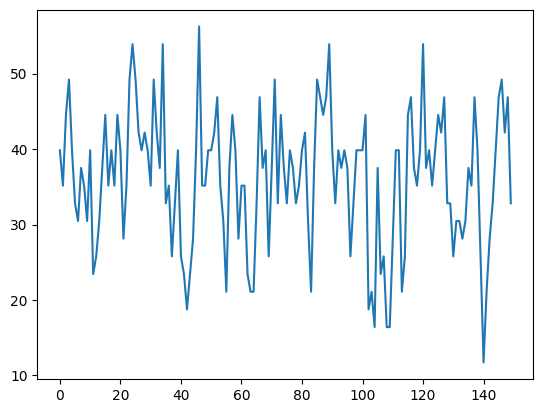

In [22]:
plt.plot(a.T[0])